In [1]:
from keras.datasets import boston_housing
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras import layers, models
import matplotlib.pyplot as plt

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

### Normalization

In [4]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(train_data)

# Normalize the training data
train_data_normalized = scaler.transform(train_data)

# Normalize the test data using the same scaler
test_data_normalized = scaler.transform(test_data)

# Hold-out Validation

In [5]:
num_validation_samples = 50

In [6]:
np.random.shuffle(train_data_normalized)

In [7]:
validation_data = train_data_normalized[:num_validation_samples]
final_train_data = train_data_normalized[num_validation_samples:]
final_train_data.shape,  validation_data.shape

((354, 13), (50, 13))

In [8]:
final_train_targets = train_targets[num_validation_samples:]
final_train_targets.shape

(354,)

In [9]:
target_validation_data = train_targets[:num_validation_samples]
target_validation_data.shape

(50,)

In [10]:
def get_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (final_train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])
    return model

In [11]:
model= get_model()

# Train the model
epochs = 40
batch_size = 16

history = model.fit(final_train_data, final_train_targets, validation_data=(validation_data, target_validation_data), epochs=epochs, batch_size=batch_size)

Epoch 1/40
23/23 [==============================] - 1s 19ms/step - loss: 550.0576 - mae: 21.5396 - val_loss: 429.0368 - val_mae: 18.7199
Epoch 2/40
23/23 [==============================] - 0s 5ms/step - loss: 411.4131 - mae: 18.0529 - val_loss: 268.8276 - val_mae: 13.9162
Epoch 3/40
23/23 [==============================] - 0s 5ms/step - loss: 247.8347 - mae: 12.7449 - val_loss: 140.2421 - val_mae: 8.8443
Epoch 4/40
23/23 [==============================] - 0s 6ms/step - loss: 137.1097 - mae: 8.6304 - val_loss: 77.7565 - val_mae: 6.5837
Epoch 5/40
23/23 [==============================] - 0s 5ms/step - loss: 107.3173 - mae: 7.5730 - val_loss: 74.3744 - val_mae: 6.8231
Epoch 6/40
23/23 [==============================] - 0s 6ms/step - loss: 100.5567 - mae: 7.3551 - val_loss: 75.2602 - val_mae: 6.9190
Epoch 7/40
23/23 [==============================] - 0s 6ms/step - loss: 96.8682 - mae: 7.2480 - val_loss: 72.9685 - val_mae: 6.2043
Epoch 8/40
23/23 [==============================] - 0s 9ms/st

In [25]:
test_score=model.evaluate(test_data_normalized, test_targets)
test_score

4/4 [==============================] - 0s 5ms/step - loss: 86.7708 - mae: 7.1395


[86.7707748413086, 7.139461517333984]

## Ploting

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [13]:
train_losses = history_dict['loss']
train_mae = history_dict['mae']
val_losses = history_dict['val_loss']
val_mae = history_dict['val_mae']
epochs = range(1, len(val_mae)+1)

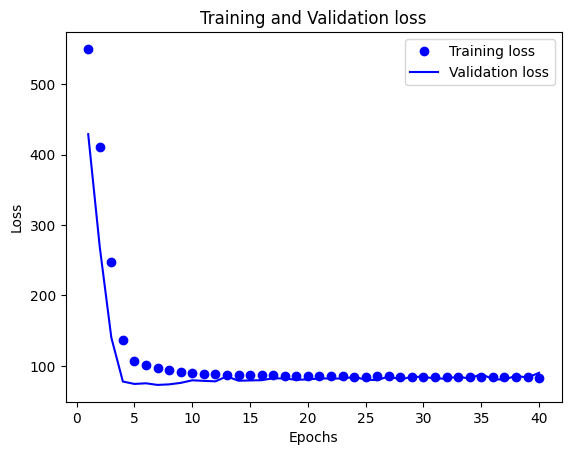

In [14]:
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'b', label= 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

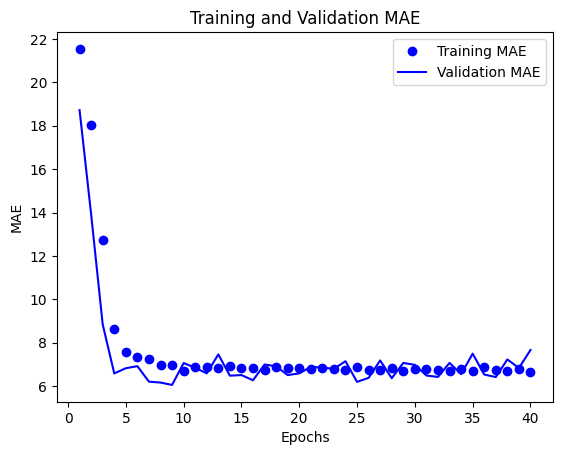

In [15]:
plt.clf()
plt.plot(epochs, train_mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label= 'Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

## Final Model

In [22]:
final_model = get_model() 
final_model.fit(final_train_data, final_train_targets, epochs=35, batch_size=16)

Epoch 1/35
23/23 [==============================] - 1s 4ms/step - loss: 526.5774 - mae: 20.9504
Epoch 2/35
23/23 [==============================] - 0s 3ms/step - loss: 368.4770 - mae: 16.6865
Epoch 3/35
23/23 [==============================] - 0s 3ms/step - loss: 199.0014 - mae: 11.0171
Epoch 4/35
23/23 [==============================] - 0s 3ms/step - loss: 121.6050 - mae: 8.0685
Epoch 5/35
23/23 [==============================] - 0s 2ms/step - loss: 104.8343 - mae: 7.5131
Epoch 6/35
23/23 [==============================] - 0s 2ms/step - loss: 98.6687 - mae: 7.1773
Epoch 7/35
23/23 [==============================] - 0s 2ms/step - loss: 94.4780 - mae: 7.1493
Epoch 8/35
23/23 [==============================] - 0s 3ms/step - loss: 91.1685 - mae: 6.9691
Epoch 9/35
23/23 [==============================] - 0s 2ms/step - loss: 89.8299 - mae: 6.9092
Epoch 10/35
23/23 [==============================] - 0s 3ms/step - loss: 87.9038 - mae: 6.8509
Epoch 11/35
23/23 [==============================] 

In [23]:
test_score=final_model.evaluate(test_data_normalized, test_targets)
test_score

4/4 [==============================] - 0s 4ms/step - loss: 81.7284 - mae: 6.7466


[81.7283935546875, 6.7465500831604]